### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, jaccard_score


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("testset.csv")

In [3]:
df

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0        Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
1             Duke  ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
2          Arizona  P12  38  34  117.5   86.9   0.9700   53.5   45.1  16.5   
3          Gonzaga  WCC  37  34  120.2   93.1   0.9498   57.9   44.2  16.1   
4       Louisville  ACC  36  27  109.4   87.4   0.9290   47.7   44.0  17.2   
..             ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
346           UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
347           Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
348  West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
349    Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
350         Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    15.8  32.1  23.7  36.2  22.4  54.8  44.7  36.5  37.5   59.3  11.3   
1    18.6  35.8  30.2  39.8  23.9  55.9  46.3  38.7  31.4   66.4  10.7   
2    20.6  34.5  22.4  47.1  37.3  53.3  42.7  36.0  33.5   66.7   9.0   
3    17.1  33.9  28.0  38.7  30.5  57.0  42.0  40.0  33.0   65.2   7.8   
4    21.3  34.7  30.8  38.7  33.3  48.4  43.3  30.7  30.3   65.6   5.8   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
346  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
347  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
348  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
349  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
350  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

    POSTSEASON  SEED  YEAR  
0          2ND   1.0  2020  
1    Champions   1.0  2020  
2           E8   2.0  2020  
3           E8   2.0  2020  
4           E8   4.0  2020  
..         ...   ...   ...  
346        S16  11.0  2020  
347        S16   5.0  2020  
348        S16   5.0  2020  
349        S16   7.0  2020  
350        S16   6.0  2020  

[351 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        351 non-null    object 
 1   CONF        351 non-null    object 
 2   G           351 non-null    int64  
 3   W           351 non-null    int64  
 4   ADJOE       351 non-null    float64
 5   ADJDE       351 non-null    float64
 6   BARTHAG     351 non-null    float64
 7   EFG_O       351 non-null    float64
 8   EFG_D       351 non-null    float64
 9   TOR         351 non-null    float64
 10  TORD        351 non-null    float64
 11  ORB         351 non-null    float64
 12  DRB         351 non-null    float64
 13  FTR         351 non-null    float64
 14  FTRD        351 non-null    float64
 15  2P_O        351 non-null    float64
 16  2P_D        351 non-null    float64
 17  3P_O        351 non-null    float64
 18  3P_D        351 non-null    float64
 19  ADJ_T       351 non-null    f

In [5]:
df.describe(include='all')

TEAM CONF           G           W       ADJOE       ADJDE  \
count      351  351  351.000000  351.000000  351.000000  351.000000   
unique     351   33         NaN         NaN         NaN         NaN   
top     Denver  ACC         NaN         NaN         NaN         NaN   
freq         1   15         NaN         NaN         NaN         NaN   
mean       NaN  NaN   31.333333   15.666667  102.315385  102.311681   
std        NaN  NaN    2.660827    6.698401    7.401505    6.537436   
min        NaN  NaN   24.000000    0.000000   76.700000   84.000000   
25%        NaN  NaN   29.000000   11.000000   97.900000   97.750000   
50%        NaN  NaN   31.000000   15.000000  102.100000  102.600000   
75%        NaN  NaN   33.000000   20.000000  106.500000  107.100000   
max        NaN  NaN   40.000000   38.000000  129.100000  120.000000   

           BARTHAG       EFG_O       EFG_D         TOR        TORD  \
count   351.000000  351.000000  351.000000  351.000000  351.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.493902   48.973789   49.180627   19.125641   19.039886   
std       0.256439    3.220248    2.901255    2.070562    2.137503   
min       0.007700   39.400000   39.600000   12.400000   14.000000   
25%       0.286650   46.900000   47.050000   17.800000   17.600000   
50%       0.467700   49.000000   49.200000   19.200000   18.900000   
75%       0.704000   50.800000   51.250000   20.300000   20.400000   
max       0.984200   58.300000   55.800000   26.100000   28.000000   

               ORB         DRB         FTR        FTRD        2P_O  \
count   351.000000  351.000000  351.000000  351.000000  351.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     30.862963   31.090028   37.043305   37.326781   47.732194   
std       3.943029    2.912875    4.747210    6.155353    3.285721   
min      19.300000   22.400000   26.100000   22.400000   38.400000   
25%      28.650000   29.200000   33.550000   33.100000   45.600000   
50%      30.800000   31.200000   36.600000   36.600000   47.600000   
75%      33.700000   32.900000   40.300000   41.500000   49.700000   
max      42.100000   40.400000   51.000000   55.500000   58.200000   

              2P_D        3P_O        3P_D       ADJ_T         WAB POSTSEASON  \
count   351.000000  351.000000  351.000000  351.000000  351.000000         68   
unique         NaN         NaN         NaN         NaN         NaN          8   
top            NaN         NaN         NaN         NaN         NaN        R64   
freq           NaN         NaN         NaN         NaN         NaN         32   
mean     47.917379   34.165527   34.402564   64.936467   -7.764957        NaN   
std       3.233761    2.982910    2.481859    2.686141    6.947090        NaN   
min      37.700000   25.200000   27.100000   57.200000  -23.200000        NaN   
25%      45.600000   32.100000   32.700000   63.300000  -12.800000        NaN   
50%      48.000000   34.200000   34.300000   64.900000   -8.400000        NaN   
75%      50.150000   36.050000   36.150000   66.600000   -3.300000        NaN   
max      56.500000   44.100000   40.300000   77.300000   13.100000        NaN   

             SEED    YEAR  
count   68.000000   351.0  
unique        NaN     NaN  
top           NaN     NaN  
freq          NaN     NaN  
mean     8.794118  2020.0  
std      4.698551     0.0  
min      1.000000  2020.0  
25%      5.000000  2020.0  
50%      9.000000  2020.0  
75%     13.000000  2020.0  
max     16.000000  2020.0

In [6]:
df.shape

(351, 24)

In [7]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

### Data Exploration

In [8]:
df['POSTSEASON'].value_counts()

R64          32
R32          16
S16           8
R68           4
E8            4
F4            2
2ND           1
Champions     1
Name: POSTSEASON, dtype: int64

In [9]:
df['SEED'].value_counts()

16.0    6
11.0    6
9.0     4
13.0    4
12.0    4
15.0    4
10.0    4
14.0    4
8.0     4
6.0     4
5.0     4
7.0     4
3.0     4
4.0     4
2.0     4
1.0     4
Name: SEED, dtype: int64

In [10]:
df['YEAR'].value_counts()

2020    351
Name: YEAR, dtype: int64

### Data Visualization

### Univariate Data Exploration

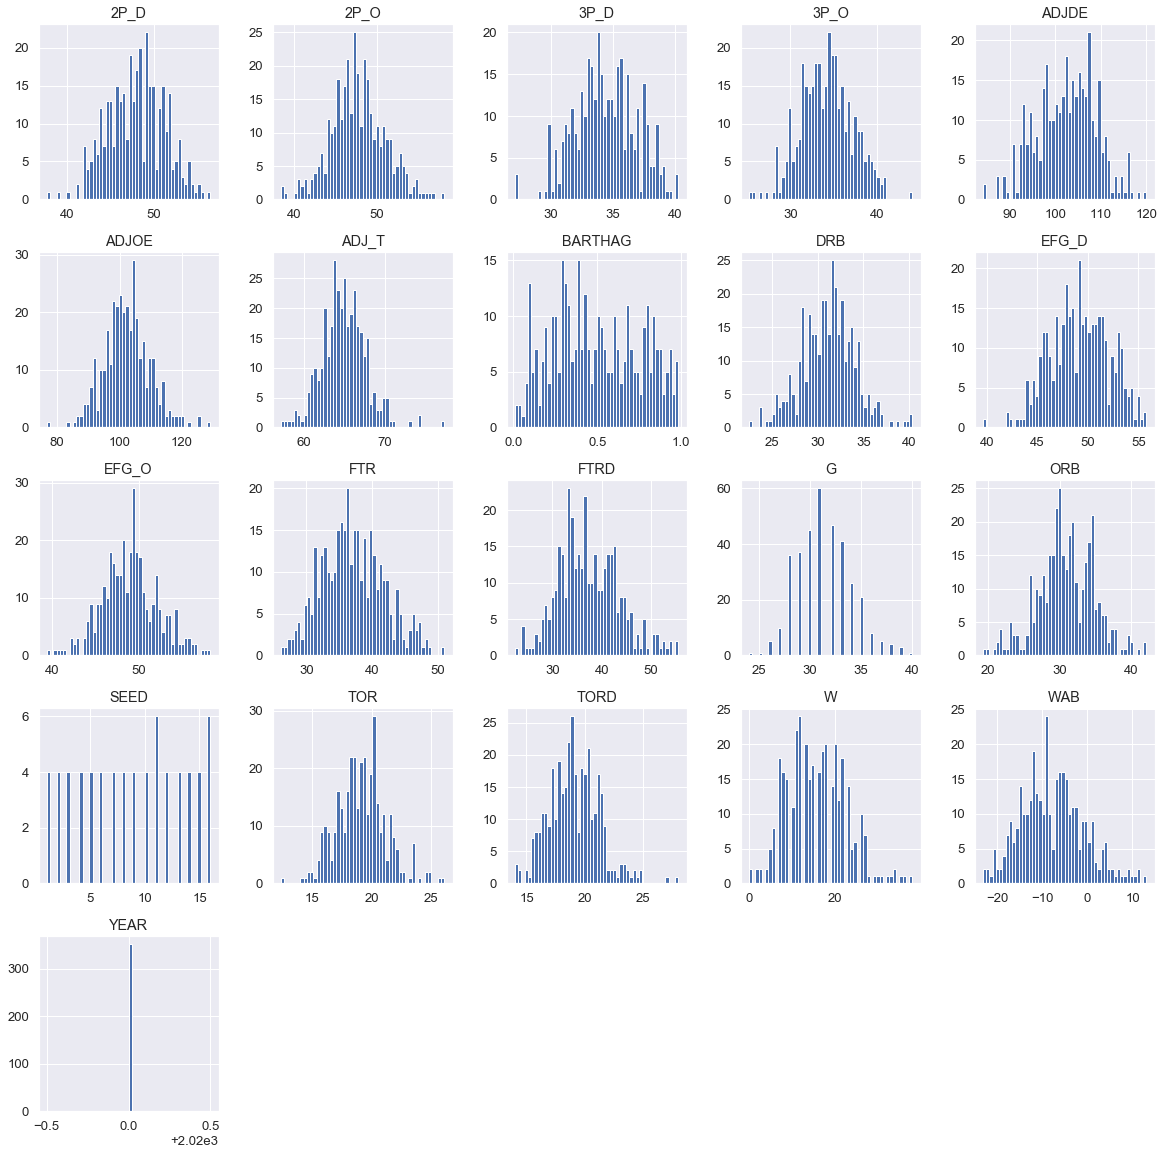

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

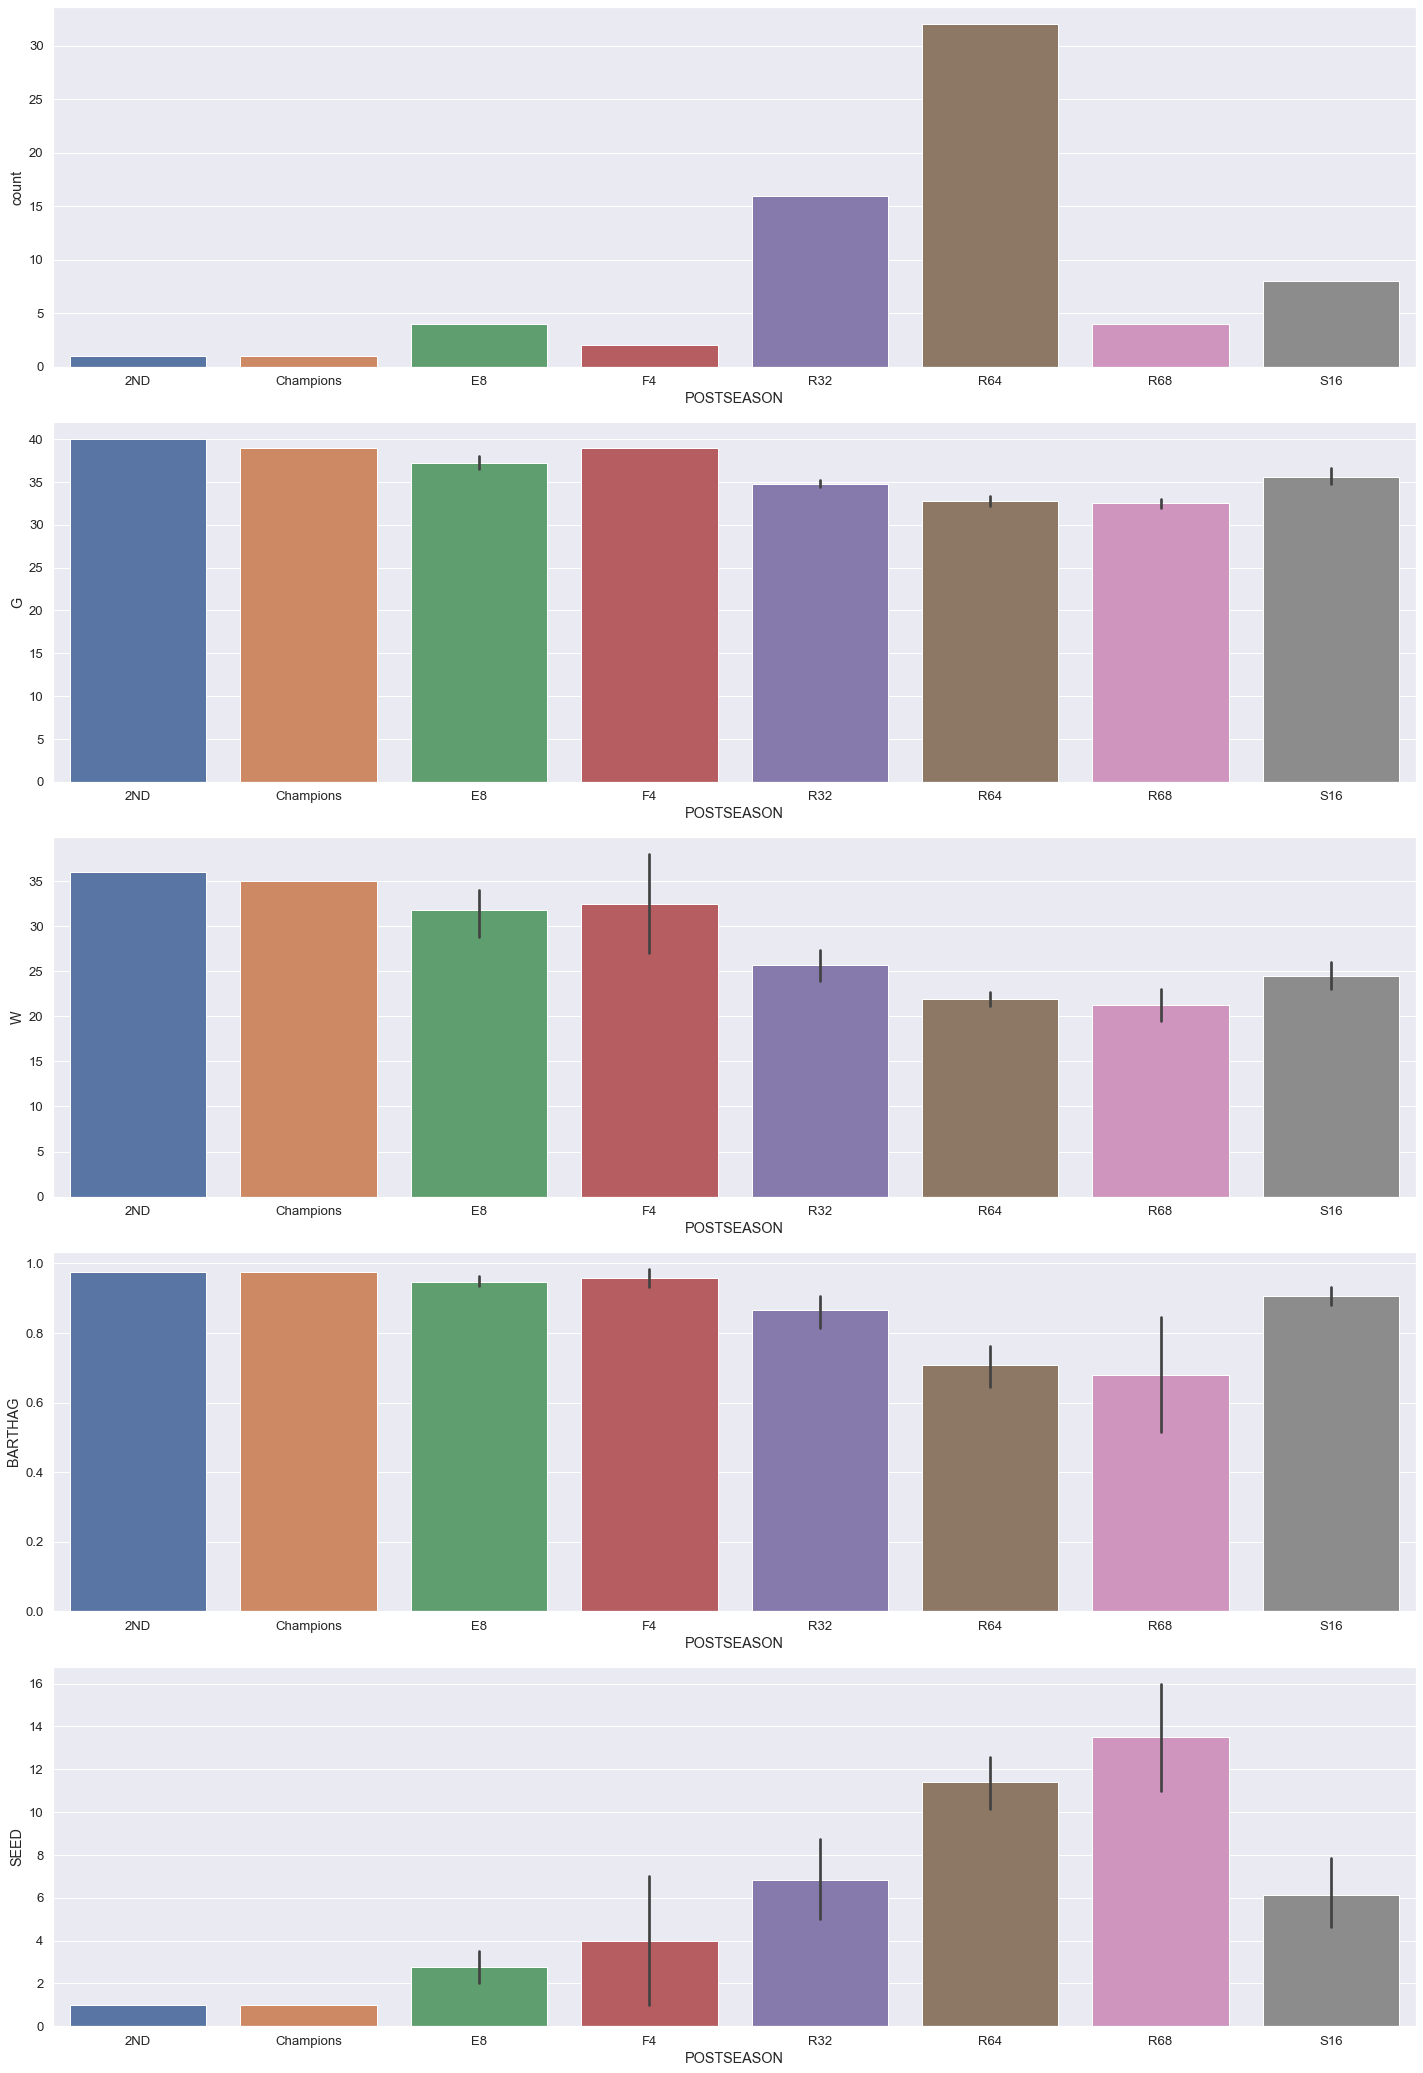

In [12]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
sns.countplot(df.POSTSEASON)

plt.subplot(7,1,2)
sns.barplot(x=df.POSTSEASON, y=df.G)

plt.subplot(7,1,3)
sns.barplot(x=df.POSTSEASON, y=df.W)

plt.subplot(7,1,4)
sns.barplot(x=df.POSTSEASON, y=df.BARTHAG)

plt.subplot(7,1,5)
sns.barplot(x=df.POSTSEASON, y=df.SEED)

# plt.subplot(7,2,6)
# sns.countplot()

# plt.subplot(7,2,7)
# sns.countplot()

# plt.subplot(7,2,8)
# sns.countplot()

# plt.subplot(7,2,9)
# sns.countplot()

# plt.subplot(7,2,10)
# sns.countplot()

# plt.subplot(7,2,11)
# sns.countplot()

# plt.subplot(7,2,12)
# sns.countplot()

# plt.subplot(7,2,13)
# sns.countplot()

# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

In [13]:
# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='reg')

# sns.jointplot(x='', y='',data=df, kind='reg')


# plt.show()

In [14]:
df.corr()

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.761925  0.624073 -0.636779  0.705678  0.324032 -0.537817   
W        0.761925  1.000000  0.801423 -0.716624  0.847295  0.592467 -0.660921   
ADJOE    0.624073  0.801423  1.000000 -0.539960  0.862199  0.726252 -0.389276   
ADJDE   -0.636779 -0.716624 -0.539960  1.000000 -0.859132 -0.173423  0.804933   
BARTHAG  0.705678  0.847295  0.862199 -0.859132  1.000000  0.500407 -0.668064   
EFG_O    0.324032  0.592467  0.726252 -0.173423  0.500407  1.000000 -0.138123   
EFG_D   -0.537817 -0.660921 -0.389276  0.804933 -0.668064 -0.138123  1.000000   
TOR     -0.373802 -0.559359 -0.646157  0.292985 -0.524155 -0.384181  0.210620   
TORD     0.066830  0.090071 -0.133630 -0.211188  0.037615 -0.111970  0.006091   
ORB      0.261576  0.315849  0.262905 -0.312718  0.318006 -0.162738 -0.332915   
DRB     -0.231071 -0.366912 -0.297612  0.414483 -0.379726 -0.193113  0.254432   
FTR      0.125318  0.202458  0.121736 -0.146688  0.148836  0.059323 -0.158416   
FTRD    -0.276783 -0.373094 -0.382781  0.218123 -0.348191 -0.324046  0.208443   
2P_O     0.324231  0.585170  0.673173 -0.243265  0.508690  0.901861 -0.213763   
2P_D    -0.498688 -0.611100 -0.390833  0.749647 -0.632731 -0.147967  0.914599   
3P_O     0.236589  0.423403  0.572724 -0.033971  0.339358  0.800941 -0.001240   
3P_D    -0.371907 -0.464753 -0.219310  0.564575 -0.449217 -0.066621  0.726194   
ADJ_T   -0.060189 -0.075099 -0.004502  0.185674 -0.096670 -0.021286  0.183284   
WAB      0.672638  0.929709  0.866480 -0.795766  0.936813  0.555832 -0.642118   
SEED    -0.617171 -0.736478 -0.753385  0.751341 -0.853714 -0.177822  0.446179   
YEAR          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.373802  0.066830  0.261576 -0.231071  0.125318 -0.276783  0.324231   
W       -0.559359  0.090071  0.315849 -0.366912  0.202458 -0.373094  0.585170   
ADJOE   -0.646157 -0.133630  0.262905 -0.297612  0.121736 -0.382781  0.673173   
ADJDE    0.292985 -0.211188 -0.312718  0.414483 -0.146688  0.218123 -0.243265   
BARTHAG -0.524155  0.037615  0.318006 -0.379726  0.148836 -0.348191  0.508690   
EFG_O   -0.384181 -0.111970 -0.162738 -0.193113  0.059323 -0.324046  0.901861   
EFG_D    0.210620  0.006091 -0.332915  0.254432 -0.158416  0.208443 -0.213763   
TOR      1.000000  0.108616  0.050395  0.227092  0.158728  0.323956 -0.308855   
TORD     0.108616  1.000000  0.056656  0.293369  0.075651  0.379749 -0.011794   
ORB      0.050395  0.056656  1.000000 -0.128482  0.212731  0.075582 -0.064643   
DRB      0.227092  0.293369 -0.128482  1.000000 -0.098305  0.170933 -0.164805   
FTR      0.158728  0.075651  0.212731 -0.098305  1.000000  0.075830  0.123796   
FTRD     0.323956  0.379749  0.075582  0.170933  0.075830  1.000000 -0.291682   
2P_O    -0.308855 -0.011794 -0.064643 -0.164805  0.123796 -0.291682  1.000000   
2P_D     0.220800  0.049530 -0.310545  0.305235 -0.147137  0.189496 -0.225782   
3P_O    -0.369634 -0.221446 -0.212413 -0.181820 -0.023291 -0.277562  0.472954   
3P_D     0.095278 -0.090323 -0.232385  0.048342 -0.095087  0.168440 -0.110492   
ADJ_T   -0.015236  0.019437  0.058924  0.207785  0.093441  0.155850  0.006445   
WAB     -0.558534  0.046020  0.318499 -0.349015  0.183660 -0.388687  0.558398   
SEED     0.396208 -0.028491 -0.291190  0.164420 -0.075424  0.220457 -0.222019   
YEAR          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             2P_D      3P_O      3P_D     ADJ_T       WAB      SEED  YEAR  
G       -0.498688  0.236589 -0.371907 -0.060189  0.672638 -0.617171   NaN  
W       -0.611100  0.423403 -0.464753 -0.075099  0.929709 -0.736478   NaN  
ADJOE   -0.390833  0.572724 -0.219310 -0.004502  0.866480 -0.753385   NaN  
ADJDE    0.749647 -0.033971  0.564575  0.185674 -0.795766  0.751341   NaN  
BARTHAG -0.632731  0.339358 -0.449217 -0.096670  0.936813 -0.853714   

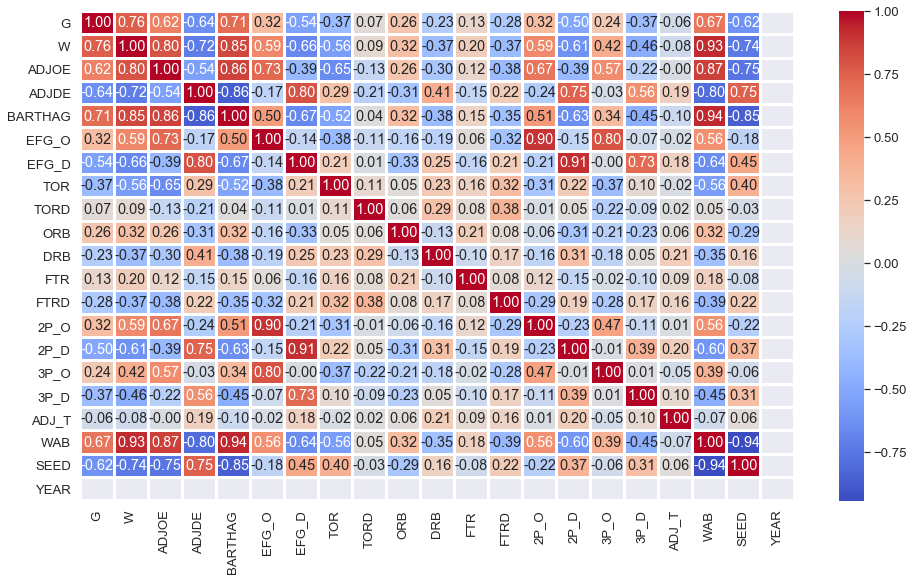

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

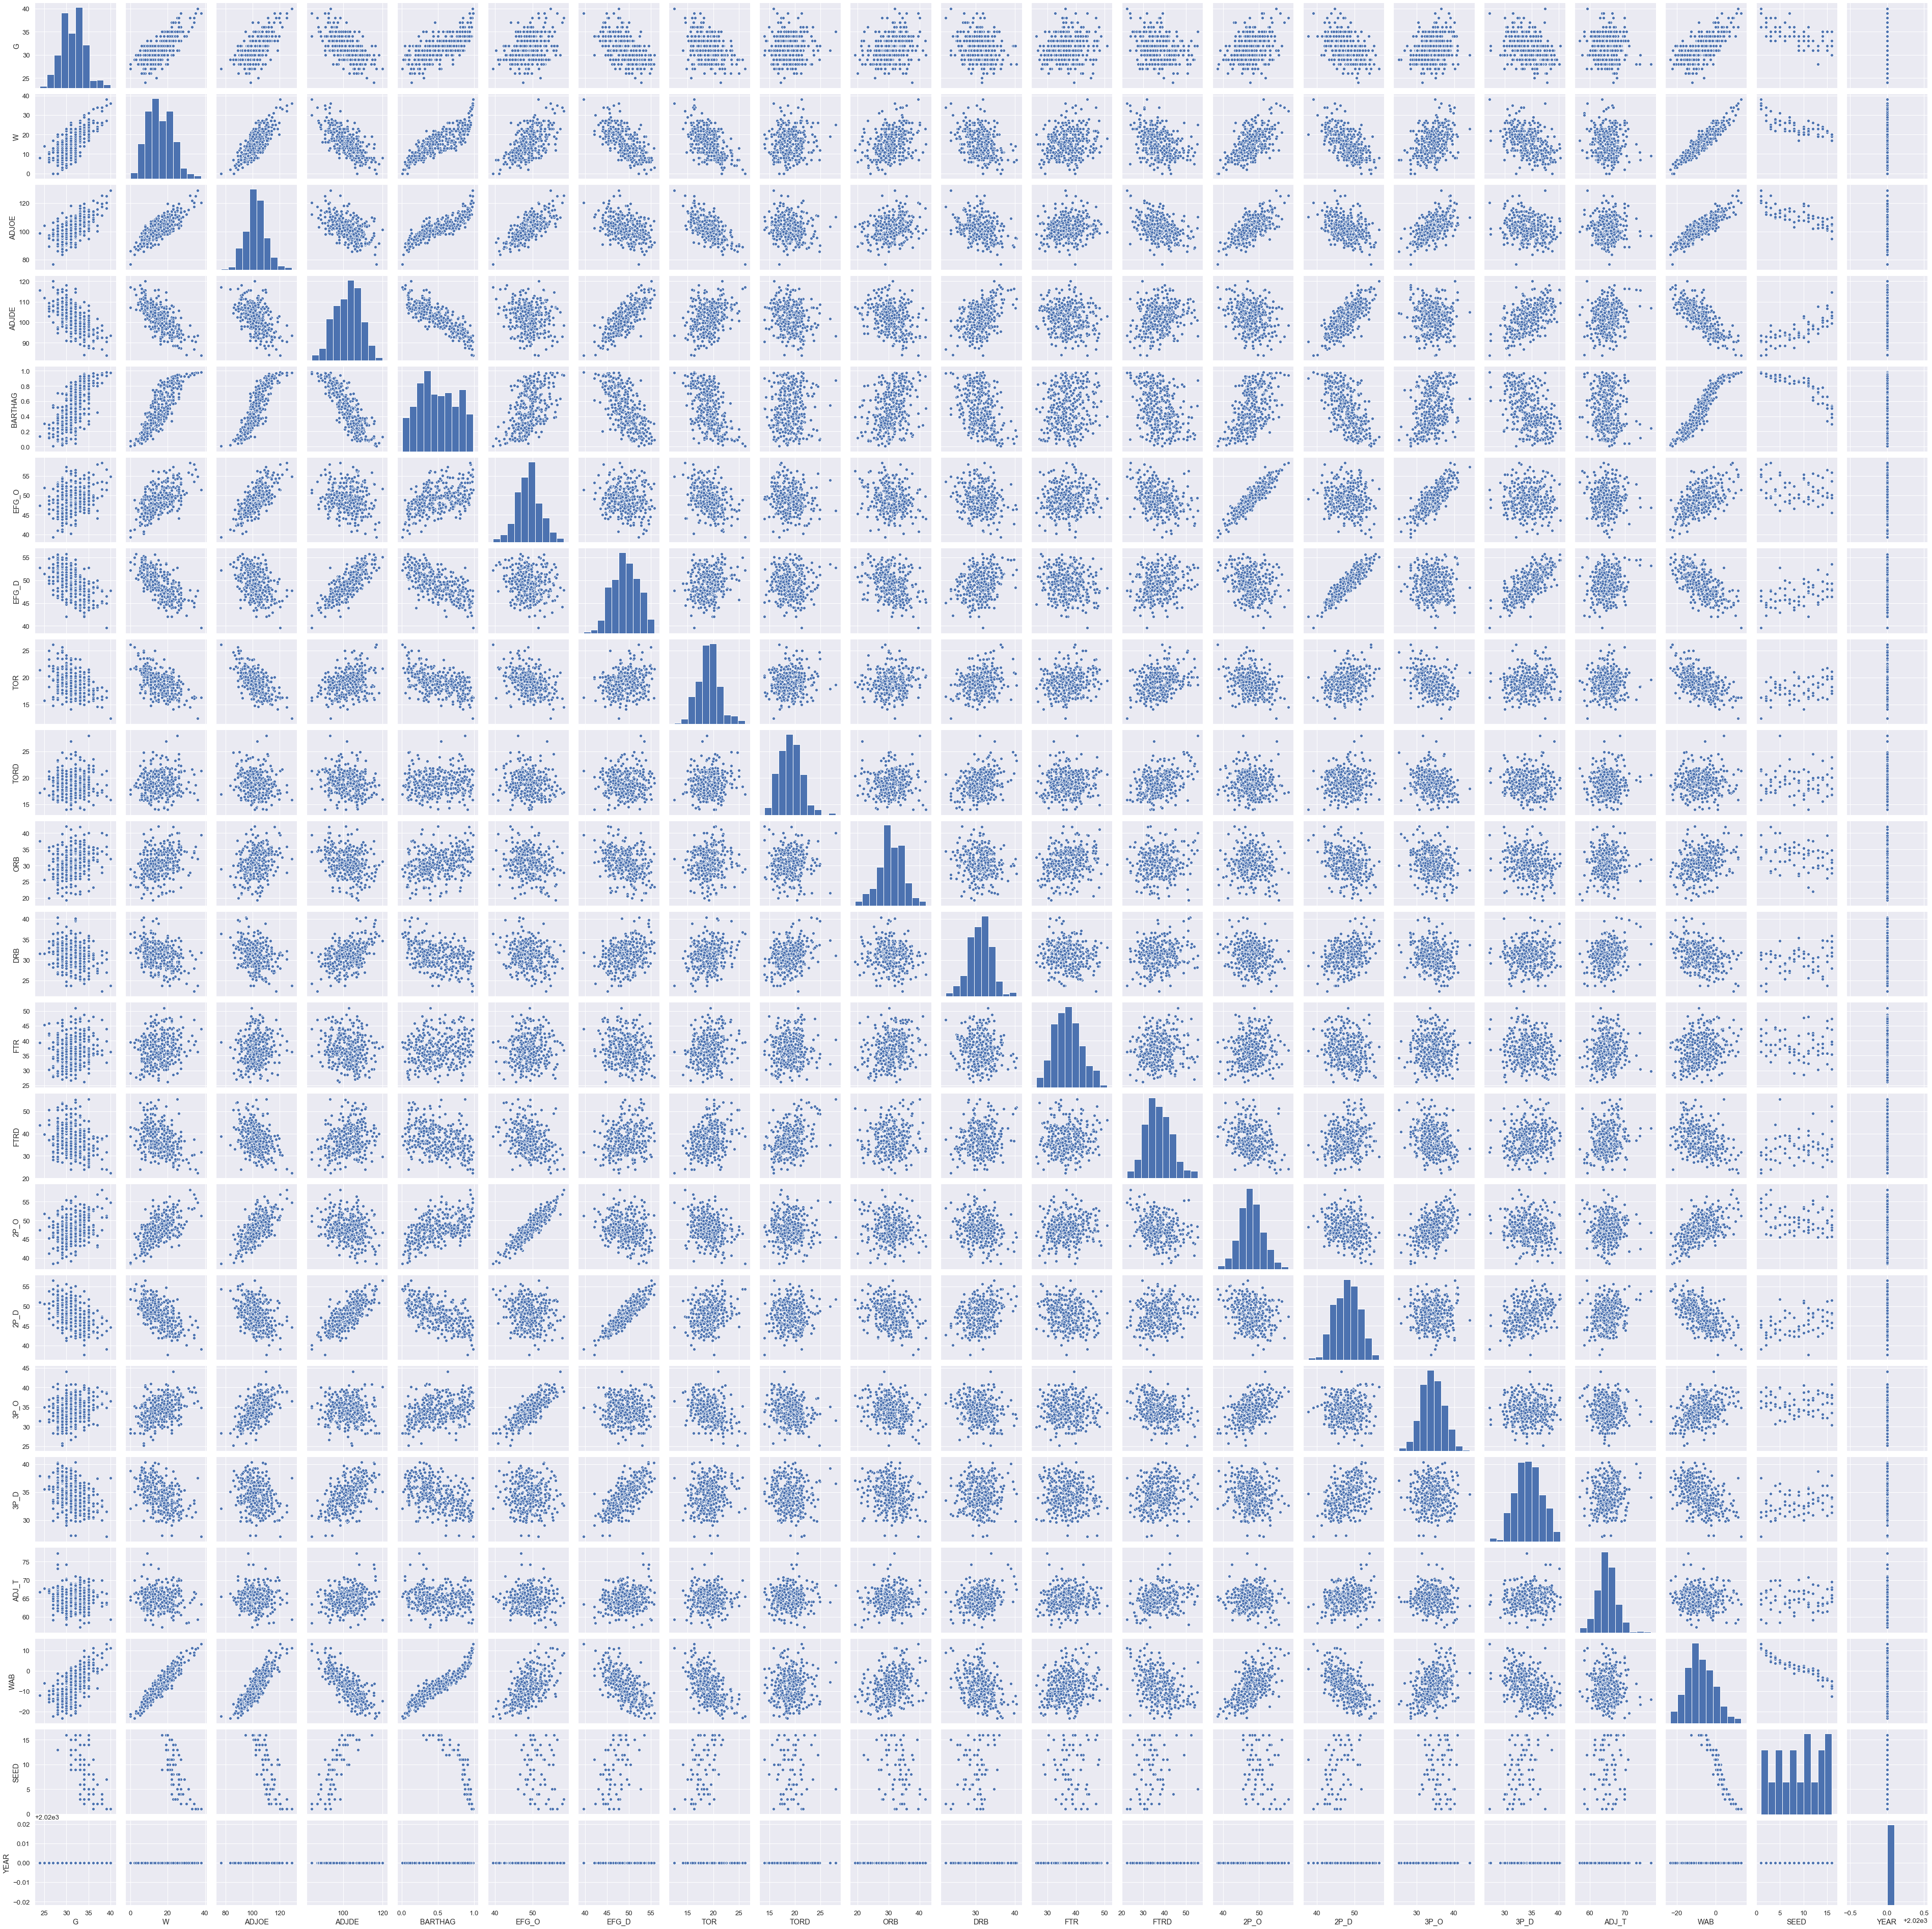

In [16]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [17]:
df.isnull().sum()

TEAM            0
CONF            0
G               0
W               0
ADJOE           0
ADJDE           0
BARTHAG         0
EFG_O           0
EFG_D           0
TOR             0
TORD            0
ORB             0
DRB             0
FTR             0
FTRD            0
2P_O            0
2P_D            0
3P_O            0
3P_D            0
ADJ_T           0
WAB             0
POSTSEASON    283
SEED          283
YEAR            0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
1            Duke  ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
2         Arizona  P12  38  34  117.5   86.9   0.9700   53.5   45.1  16.5   
3         Gonzaga  WCC  37  34  120.2   93.1   0.9498   57.9   44.2  16.1   
4      Louisville  ACC  36  27  109.4   87.4   0.9290   47.7   44.0  17.2   
..            ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
63           UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
64           Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
65  West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
66    Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
67         Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

    TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0   15.8  32.1  23.7  36.2  22.4  54.8  44.7  36.5  37.5   59.3  11.3   
1   18.6  35.8  30.2  39.8  23.9  55.9  46.3  38.7  31.4   66.4  10.7   
2   20.6  34.5  22.4  47.1  37.3  53.3  42.7  36.0  33.5   66.7   9.0   
3   17.1  33.9  28.0  38.7  30.5  57.0  42.0  40.0  33.0   65.2   7.8   
4   21.3  34.7  30.8  38.7  33.3  48.4  43.3  30.7  30.3   65.6   5.8   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
63  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
64  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
65  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
66  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
67  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

   POSTSEASON  SEED  YEAR  
0         2ND   1.0  2020  
1   Champions   1.0  2020  
2          E8   2.0  2020  
3          E8   2.0  2020  
4          E8   4.0  2020  
..        ...   ...   ...  
63        S16  11.0  2020  
64        S16   5.0  2020  
65        S16   5.0  2020  
66        S16   7.0  2020  
67        S16   6.0  2020  

[68 rows x 24 columns]

### Replacing values

Filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season

In [22]:
df['POSTSEASON'].value_counts()

R64          32
R32          16
S16           8
R68           4
E8            4
F4            2
2ND           1
Champions     1
Name: POSTSEASON, dtype: int64

Create a new label (0 = NOT in S16,E8 and F4; 1 = WITHIN S16,E8 and F4)

In [23]:
df["POSTSEASON"].replace(to_replace=['R64','R32','R68','2ND','Champions'],value=0,inplace=True)

In [24]:
df

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
1            Duke  ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
2         Arizona  P12  38  34  117.5   86.9   0.9700   53.5   45.1  16.5   
3         Gonzaga  WCC  37  34  120.2   93.1   0.9498   57.9   44.2  16.1   
4      Louisville  ACC  36  27  109.4   87.4   0.9290   47.7   44.0  17.2   
..            ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
63           UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
64           Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
65  West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
66    Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
67         Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

    TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0   15.8  32.1  23.7  36.2  22.4  54.8  44.7  36.5  37.5   59.3  11.3   
1   18.6  35.8  30.2  39.8  23.9  55.9  46.3  38.7  31.4   66.4  10.7   
2   20.6  34.5  22.4  47.1  37.3  53.3  42.7  36.0  33.5   66.7   9.0   
3   17.1  33.9  28.0  38.7  30.5  57.0  42.0  40.0  33.0   65.2   7.8   
4   21.3  34.7  30.8  38.7  33.3  48.4  43.3  30.7  30.3   65.6   5.8   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
63  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
64  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
65  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
66  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
67  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

   POSTSEASON  SEED  YEAR  
0           0   1.0  2020  
1           0   1.0  2020  
2          E8   2.0  2020  
3          E8   2.0  2020  
4          E8   4.0  2020  
..        ...   ...   ...  
63        S16  11.0  2020  
64        S16   5.0  2020  
65        S16   5.0  2020  
66        S16   7.0  2020  
67        S16   6.0  2020  

[68 rows x 24 columns]

In [25]:
df["POSTSEASON"].replace(to_replace=['S16','E8','F4'],value=1,inplace=True)

In [26]:
df

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
1            Duke  ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
2         Arizona  P12  38  34  117.5   86.9   0.9700   53.5   45.1  16.5   
3         Gonzaga  WCC  37  34  120.2   93.1   0.9498   57.9   44.2  16.1   
4      Louisville  ACC  36  27  109.4   87.4   0.9290   47.7   44.0  17.2   
..            ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
63           UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
64           Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
65  West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
66    Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
67         Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

    TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0   15.8  32.1  23.7  36.2  22.4  54.8  44.7  36.5  37.5   59.3  11.3   
1   18.6  35.8  30.2  39.8  23.9  55.9  46.3  38.7  31.4   66.4  10.7   
2   20.6  34.5  22.4  47.1  37.3  53.3  42.7  36.0  33.5   66.7   9.0   
3   17.1  33.9  28.0  38.7  30.5  57.0  42.0  40.0  33.0   65.2   7.8   
4   21.3  34.7  30.8  38.7  33.3  48.4  43.3  30.7  30.3   65.6   5.8   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
63  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
64  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
65  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
66  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
67  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

    POSTSEASON  SEED  YEAR  
0            0   1.0  2020  
1            0   1.0  2020  
2            1   2.0  2020  
3            1   2.0  2020  
4            1   4.0  2020  
..         ...   ...   ...  
63           1  11.0  2020  
64           1   5.0  2020  
65           1   5.0  2020  
66           1   7.0  2020  
67           1   6.0  2020  

[68 rows x 24 columns]

### Treat Duplicate Values

In [27]:
df.duplicated(keep='first').sum()

0

### Drop unwanted features

In [28]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [29]:
df.drop(['TEAM', 'CONF', 'POSTSEASON','YEAR'],axis=1,inplace=True)

In [30]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7  36.2   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  30.2  39.8   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  22.4  47.1   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  28.0  38.7   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  30.8  38.7   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   22.4  54.8  44.7  36.5  37.5   59.3  11.3   1.0  
1   23.9  55.9  46.3  38.7  31.4   66.4  10.7   1.0  
2   37.3  53.3  42.7  36.0  33.5   66.7   9.0   2.0  
3   30.5  57.0  42.0  40.0  33.0   65.2   7.8   2.0  
4   33.3  48.4  43.3  30.7  30.3   65.6   5.8   4.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
63  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
64  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
65  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
66  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
67  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[68 rows x 20 columns]

In [31]:
df.columns

Index(['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED'],
      dtype='object')

In [33]:
df = df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'SEED']]

In [34]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7  36.2   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  30.2  39.8   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  22.4  47.1   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  28.0  38.7   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  30.8  38.7   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   22.4  54.8  44.7  36.5  37.5   59.3  11.3   1.0  
1   23.9  55.9  46.3  38.7  31.4   66.4  10.7   1.0  
2   37.3  53.3  42.7  36.0  33.5   66.7   9.0   2.0  
3   30.5  57.0  42.0  40.0  33.0   65.2   7.8   2.0  
4   33.3  48.4  43.3  30.7  30.3   65.6   5.8   4.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
63  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
64  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
65  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
66  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
67  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[68 rows x 20 columns]

### Create and save processed dataset

In [35]:
df.to_csv("testfinalset.csv",index=False)

In [36]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7  36.2   
1   39  35  125.2   90.6   0.9764   56.6   46.5  16.3  18.6  35.8  30.2  39.8   
2   38  34  117.5   86.9   0.9700   53.5   45.1  16.5  20.6  34.5  22.4  47.1   
3   37  34  120.2   93.1   0.9498   57.9   44.2  16.1  17.1  33.9  28.0  38.7   
4   36  27  109.4   87.4   0.9290   47.7   44.0  17.2  21.3  34.7  30.8  38.7   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
63  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
64  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
65  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
66  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
67  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   22.4  54.8  44.7  36.5  37.5   59.3  11.3   1.0  
1   23.9  55.9  46.3  38.7  31.4   66.4  10.7   1.0  
2   37.3  53.3  42.7  36.0  33.5   66.7   9.0   2.0  
3   30.5  57.0  42.0  40.0  33.0   65.2   7.8   2.0  
4   33.3  48.4  43.3  30.7  30.3   65.6   5.8   4.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
63  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
64  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
65  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
66  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
67  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[68 rows x 20 columns]